### Student Information
Name: 張慧榮

Student ID: 411856114

GitHub ID: Timss22

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1 (preparations)

In [ ]:
### Begin Assignment Here

### import all the necessary dependencies

To make it easier, I just copy the previous import code from the master.ipynb, and later see if I will use it or not.

In [2]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to /Users/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Create dataframe and check the info of the data

In [25]:
selected_columns = ['type', 'datetime','label','subreddit', 'title', 'author', 'upvotes','text','sentiment','entities']
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv', usecols=selected_columns)
print(df.head())
print(df.info())

      type             datetime         subreddit  \
0  comment  2025-04-11 17:29:56    wallstreetbets   
1  comment   2025-04-12 1:12:19    wallstreetbets   
2  comment  2025-04-10 15:09:41       StockMarket   
3     post  2023-08-30 17:12:55  stockstobuytoday   
4  comment  2025-04-11 14:48:05       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

   upvotes                                               text  sentiment  \
0        0                                   Calls on retards       -1.0   
1      -15  Stunt as in like why did they even make a big ..

### Adding Columns to enrich data

To enrich data, we can simplyfy sentiment to a more readable data

In [4]:
df['sentiment_label'] = df['sentiment'].map({-1.0: 'Bearish', 0.0: 'Neutral', 1.0: 'Bullish'})
print(df['sentiment_label'].head())

0    Bearish
1    Bullish
2    Neutral
3    Bullish
4    Neutral
Name: sentiment_label, dtype: object


## Try out features for Fun Learning
I think best approach to learning more is to try out the features by ourselves and learn the syntaxes and how it works.

### Checking Duplicates

In [5]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


### Finding the most used term in stocks reddit

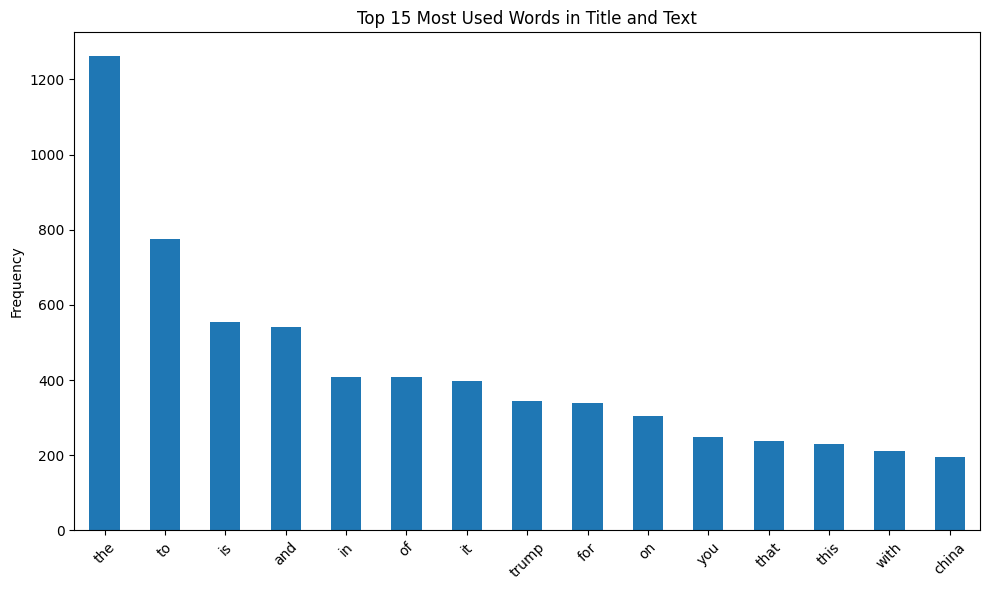

In [6]:
from collections import Counter
import re

import matplotlib.pyplot as plt

# Combine all text and title into a single list of words
all_text = ' '.join(df['text'].astype(str)) + ' ' + ' '.join(df['title'].astype(str))
# Remove non-alphabetic characters and lowercase
words = re.findall(r'\b[a-zA-Z]{2,}\b', all_text.lower())

# Count word frequencies
word_counts = Counter(words)
top_words = word_counts.most_common(15)

# 1. Convert the list of (word, count) tuples into a pandas Series.
#    The word becomes the index, and the count becomes the value.
words_series = pd.Series(dict(top_words))
# Plot
words_series.plot(
    kind='bar',
    title='Top 15 Most Used Words in Title and Text',
    ylabel='Frequency',
    rot=45, # Rotate x-axis labels
    figsize=(10, 6)
)
plt.tight_layout()
plt.show()

*Since the results end up in a lot of stop words like preposition, articles, auxiliary, etc. and not the vocabularies we want. we will attempt on filtering out those words to show the vocabularies*

[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


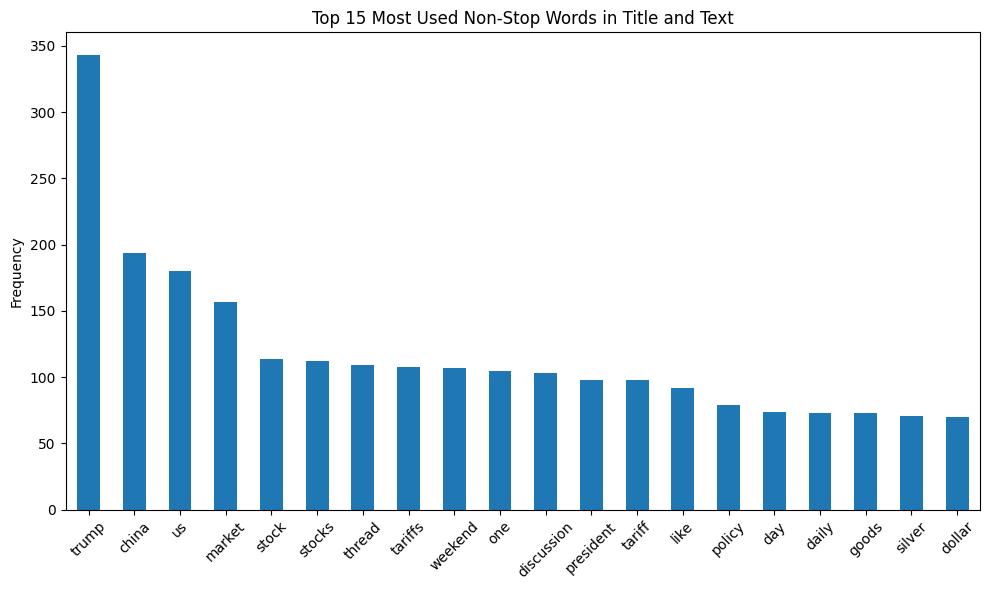

In [7]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

word_counts = Counter(filtered_words)
top_words = word_counts.most_common(20)

words_series_after = pd.Series(dict(top_words))

words_series_after.plot(
    kind='bar',
    title='Top 15 Most Used Non-Stop Words in Title and Text',
    ylabel='Frequency',
    rot=45,
    figsize=(10, 6)
)
plt.tight_layout()
plt.show()

# Exercise Implementations (second)

### exercise 1

In [8]:
for i in range(5):
    print(f"data{i+1}")

    cell_content = str(df.iloc[i, 0])

    print(cell_content.split())

data1
['comment']
data2
['comment']
data3
['comment']
data4
['post']
data5
['comment']


### Exercise 2

In [19]:
df[df['upvotes'] > 10].head()

,type,datetime,subreddit,title,author,upvotes,text,sentiment,entities,sentiment_label
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,emiljenfn,30,Vision Marine Technologies Inc. is rewriting t...,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",Bullish
5,comment,2025-04-12 2:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,16,"Hoping to ejaculate in wet warm puss tonight, ...",1.0,"['tonight', 'puss']",Bullish
19,comment,2025-04-11 4:32:16,stocks,U.S. 10-year Treasury yields rise as Trump tar...,Vanman04,12,I think we are past the numbers. Just assume f...,1.0,"['Hell', 'Far', 'stage', 'US', 'economy', 'par...",Bullish
28,comment,2025-04-11 17:21:44,wallstreetbets,Retardation is on the menu boys! WSB is so back,PlannedObsolescence-,53,"My first wife was tarded, she's a pilot now.",1.0,"['pilot', 'wife']",Bullish
42,comment,2021-02-01 13:45:17,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,3943,So they went from saying redditors are bad for...,-1.0,"['market', 'silver']",Bearish


### Exercise 3

In [9]:
df[df['sentiment_label'] == 'Bullish'][::80][:3]

,type,datetime,subreddit,title,author,upvotes,text,sentiment,entities,label,sentiment_label
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,-15,Stunt as in like why did they even make a big ...,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,Bullish
196,comment,2025-04-11 14:45:30,wallstreetbets,Weekly Earnings Thread 4/14 - 4/18,BlackAdder7,20,Just waiting for a bank to announce they are d...,1.0,"['bank', 'International', 'Harmonized', 'Tarif...",-1.0,Bullish
386,post,2025-03-21 13:01:24,stockstobuytoday,Social Media Top Trending Stocks,saasfin,2,Top trending stock tickers on social media\n\n...,1.0,"['Social', 'stock', 'stockbuyvest.com', ']']",0.0,Bullish


### Exercise 4

In [21]:
df.isnull().sum()

type               0
datetime           0
subreddit          0
title              0
author             0
upvotes            0
text               0
sentiment          0
entities           0
sentiment_label    0
dtype: int64

### Exercise 6

In [10]:
df_sample = df.sample(n=500)
df_sample[:10]

,type,datetime,subreddit,title,author,upvotes,text,sentiment,entities,label,sentiment_label
827,comment,2025-04-11 14:42:51,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,jacobatz,1,"Exciting, I guess that’s one way to characteri...",1.0,"['Exciting', '’', 'way']",1.0,Bullish
144,comment,2025-04-10 15:12:16,StockMarket,How do you feel about a sitting president maki...,ImpressiveCat2377,1,"No, they love it. It allows them to live vicar...",1.0,"['genius', 'someone', 'hand', 'money', 'trump'...",0.0,Bullish
629,comment,2025-04-11 13:05:13,stocks,Is the market in complete denial right now?,AcanthisittaLive6135,3,You’re (rhetorical?) query seems to rest on th...,-1.0,"['reason', 'query', 'base', 'ignorance', 'assu...",0.0,Bearish
707,comment,2025-04-10 15:33:27,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,RobbieKangaroo,1,You know if the supreme court doesn’t give it ...,1.0,"['doesn', 'court', 'the supreme court', 't', '...",-1.0,Bullish
832,comment,2023-12-07 14:52:08,stockstobuytoday,Anyone see the O3 Mining private placement?,CombinationLittleD,1,NICE. Cannot complain.,1.0,['NICE'],1.0,Bullish
816,comment,2025-04-11 14:02:15,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,Current_Animator7546,5,He wants Xi to call him. So it looks like he h...,0.0,"['control', 'weakness']",0.0,Neutral
257,comment,2025-04-11 14:58:21,stocks,US consumer sentiment plummets to second-lowes...,MiniTab,14,All my wife and I are buying now are groceries...,1.0,"['term', 'BEAUTIFUL', 'cash', 'wife']",0.0,Bullish
452,comment,2025-04-11 21:00:46,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,Happy_Discussion_536,16,Inflation expectations for year ahead highest ...,1.0,"['year', 'Inflation', 'Better', 'cash', '%']",1.0,Bullish
24,comment,2025-04-11 11:37:41,stocks,BREAKING: China raises tariffs on U.S. goods t...,applecokecake,1,Shop like a billionaire.,0.0,"['billionaire', 'Shop']",0.0,Neutral
715,comment,2025-03-11 21:38:43,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,thenuttyhazlenut,6,|Ticker|Company|Allocation|\n|:-|:-|:-|\n|ACGL...,1.0,"['Facilities', 'META', 'LON', 'Brasileiro|10.5...",0.0,Bullish


### Exercise 7

<Axes: title={'center': 'Top 15 Most Used Non-Stop Words in Title and Text'}, ylabel='Frequency'>

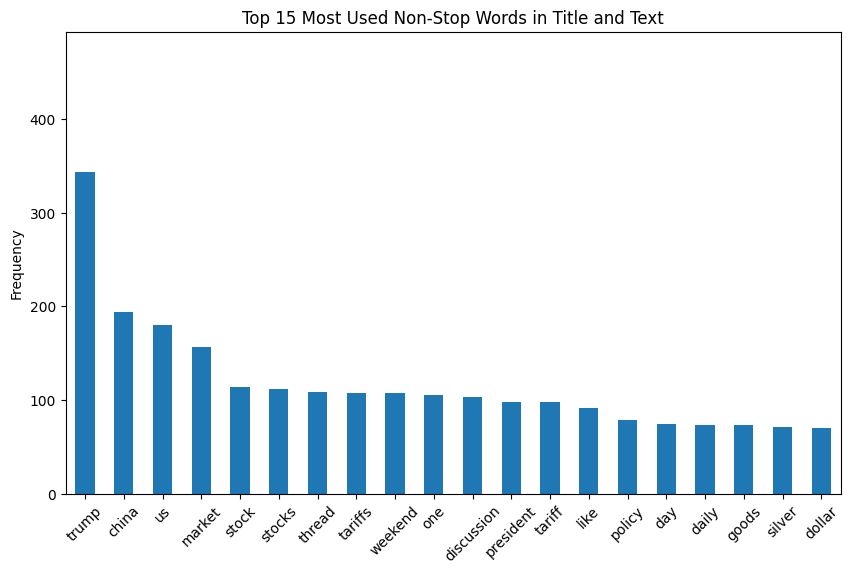

In [11]:
words_series_after.plot(
    kind='bar',
    title='Top 15 Most Used Non-Stop Words in Title and Text',
    ylabel='Frequency',
    ylim= [0, words_series_after.max() + 150],
    rot=45,
    figsize=(10, 6)
)

### Exercise 8

<Axes: title={'center': 'Top 15 Most Used Non-Stop Words in Title and Text Before and After Removing Stop Words'}, ylabel='Frequency'>

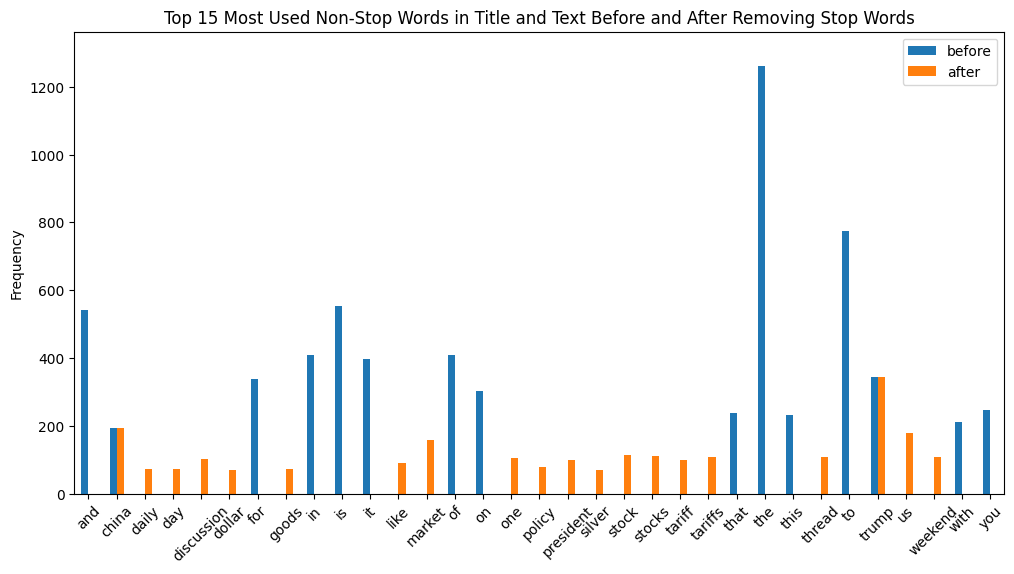

In [12]:
plot_newdf_sample = pd.DataFrame({'before': words_series, 'after': words_series_after })
plot_newdf_sample.plot(
    kind='bar',
    title='Top 15 Most Used Non-Stop Words in Title and Text Before and After Removing Stop Words',
    ylabel='Frequency',
    ylim= [0, max(words_series.max(), words_series_after.max()) + 100],
    rot=45,
    figsize=(12, 6)
)

### Exercise 9

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

analyze = count_vect.build_analyzer()
analyze(df.author[10])

['mitchcurry']

### Exercise 11

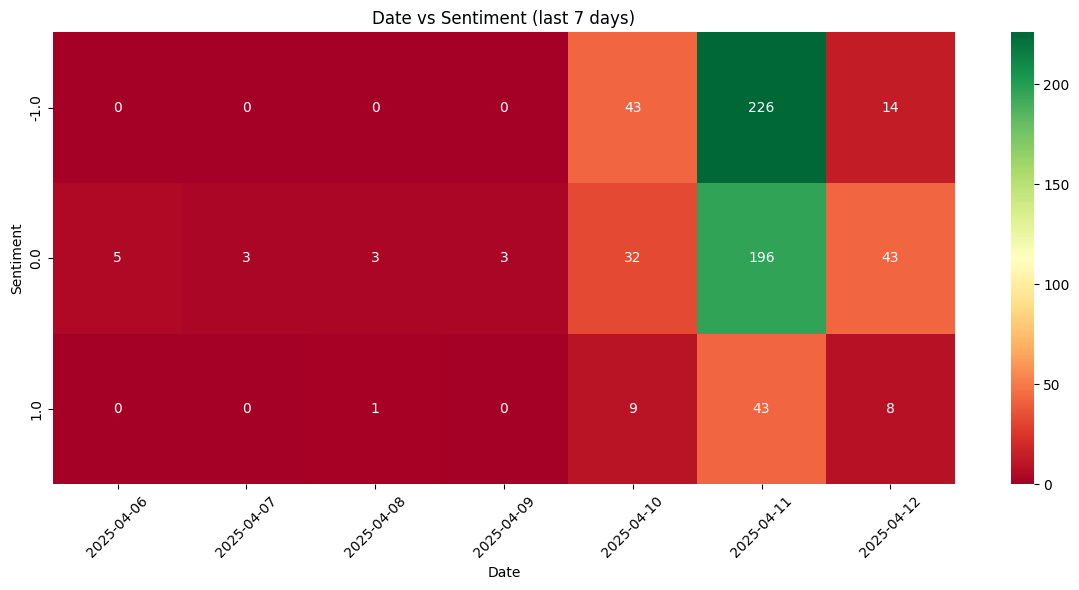

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Make sure datetime is parsed
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['date'] = df['datetime'].dt.date

# 2) Count posts by date & sentiment label
date_sentiment = df.groupby(['date','label']).size().unstack(fill_value=0)

# 3) Plot heatmap
# keep last 7 days only
sample = date_sentiment.tail(7)

plt.figure(figsize=(12,6))
sns.heatmap(sample.T, cmap="RdYlGn", annot=True, fmt="d")
plt.title("Date vs Sentiment (last 7 days)")
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Exercise 12 and 13

In [15]:
import plotly.express as px
from collections import Counter

# Convert to DataFrame for Plotly
df_plot = pd.DataFrame(top_words, columns=["Word", "Frequency"])

# Plot with Plotly
fig = px.bar(
    df_plot,
    x="Word",
    y="Frequency",
    title="Top 20 Most Used Non-Stop Words in Title and Text",
    text="Frequency",
    labels={"Word": "Word", "Frequency": "Count"},
)

# Make it interactive
fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    height=600,
    width=900
)

fig.show()


### Exercise 14

In [16]:
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(200)

# Convert to DataFrame for Plotly
df_plot = pd.DataFrame(top_words, columns=["Word", "Frequency"])

# Plot with Plotly
fig = px.bar(
    df_plot,
    x="Word",
    y="Frequency",
    title="Top 20 Most Used Non-Stop Words in Title and Text",
    text="Frequency",
    labels={"Word": "Word", "Frequency": "Count"},
)

# Make it interactive
fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    height=600,
    width=900
)

fig.show()


### Exercise 15

In [17]:
fig = px.bar(
    df_plot,
    x="Word",
    y="Frequency",
    title="Top 200 Most Used Non-Stop Words (Log Scale)",
    text="Frequency",
    labels={"Word": "Word", "Frequency": "Count"},
)

fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    height=600,
    width=1200,
    yaxis_type="log"
)

fig.show()

# data visualization (third)

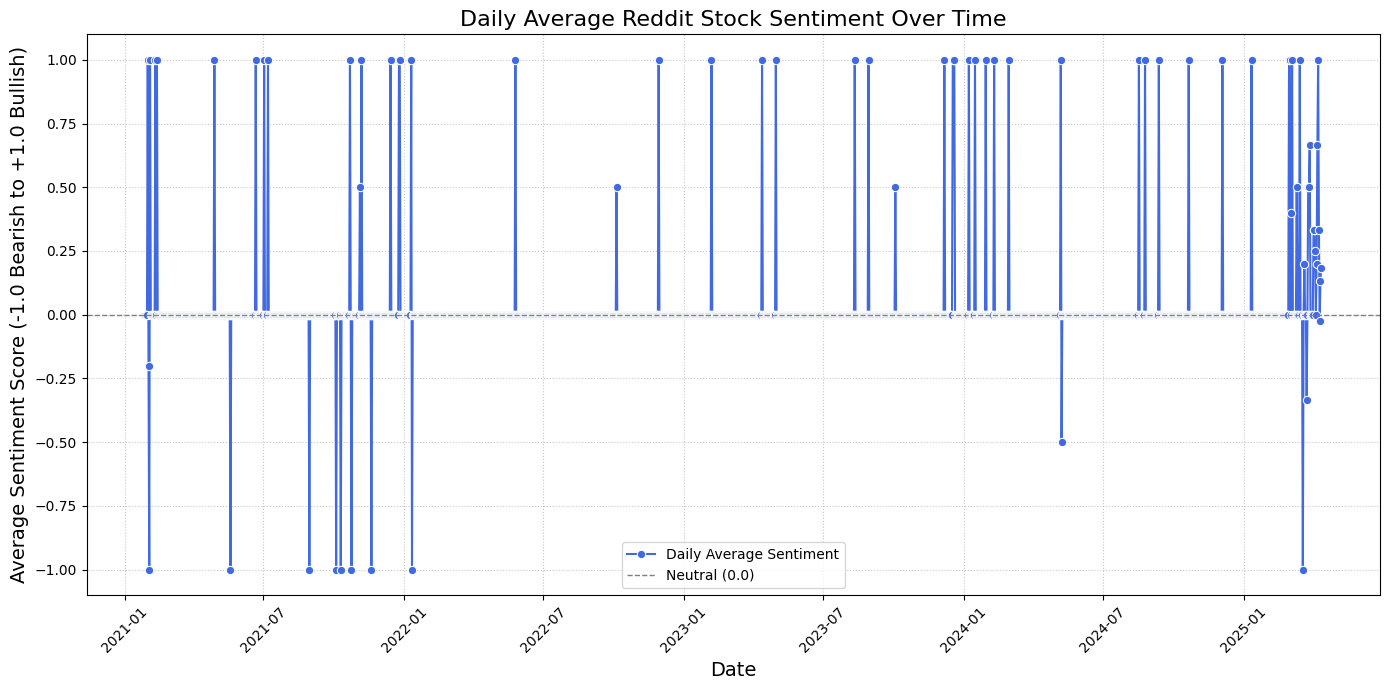

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame 'df' is loaded and contains the 'datetime' and 'sentiment' columns.

# --- 1. Ensure Date Format ---
# Convert the 'datetime' column to a proper datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# --- 2. Resample and Aggregate ---
# Set 'datetime' as the index for time-series operations
df.set_index('datetime', inplace=True)

# Resample the data daily ('D') and calculate the mean of the 'sentiment' score
# .fillna(0) assumes a day with no posts has a neutral sentiment (score 0)
daily_sentiment = df['sentiment'].resample('D').mean().fillna(0)
daily_sentiment_df = daily_sentiment.reset_index(name='Avg_Sentiment')

# --- 3. Plotting ---
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=daily_sentiment_df,
    x='datetime',
    y='Avg_Sentiment',
    marker='o',
    color='royalblue',
    label='Daily Average Sentiment'
)

# Add a horizontal line at y=0 for the neutral baseline
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Neutral (0.0)')

plt.title('Daily Average Reddit Stock Sentiment Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Sentiment Score (-1.0 Bearish to +1.0 Bullish)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('sentiment_over_time.png')

# Phase 2

In [ ]:
### Begin Assignment Here